# ANALISIS POBLACIONAL 2.0 

En este notebook se analizaran aspectos adicionales de la base de datos, se tomaran variables que no se tenían en consideración en el análisis poblacional 1.0, como lo son área en kilómetros cuadrados, tasa de crecimiento y porcentaje de población mundial de cada ciudad

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px 

In [2]:
df = pd.read_csv('world_population.csv')
df.head(26)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


### ¿Hay alguna correlación entre la población y el área de la ciudad?  

In [3]:
df.keys()

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

Hipotesis : 

H_0 = Existe una correlacion significativa entre el tamaño de la poblacion y el area de la region
H_1 = No existe correlacion significativa entre el tamaño de la poblacion y el area de la region


Iniciamos obtieniendo el coeficiente de correlacion entre el area y la poblacion del año 2022, ya que no tenemos el historico del area en los años anteriores

In [4]:
df_poblacion_area = df.loc[:,['Area (km²)','2022 Population']]
df_poblacion_area

,Area (km²),2022 Population
0,652230,41128771
1,28748,2842321
2,2381741,44903225
3,199,44273
4,468,79824
...,...,...
229,142,11572
230,266000,575986
231,527968,33696614
232,752612,20017675


In [5]:
#Matriz de Correlacion
correlacion = df_poblacion_area.corr(method='pearson')
correlacion

,Area (km²),2022 Population
Area (km²),1.000000,0.453411
2022 Population,0.453411,1.000000


<AxesSubplot: >

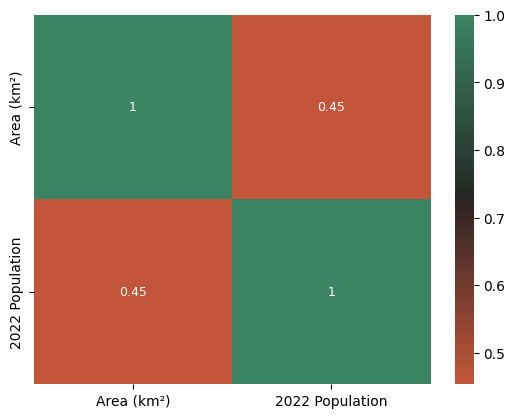

In [6]:
#Grafico de Correlacion 
sns.heatmap(
    correlacion, #Datos
    annot = True, #Coeficientes
    cbar = True, #Eje False = Sin eje
    annot_kws = {"size": 9},#Tamaño del texto
    cmap = sns.diverging_palette(20, 150, n=100,center='dark') #Detalles del grafico
    )

In [7]:
p_value = stats.pearsonr(df_poblacion_area['Area (km²)'],df_poblacion_area['2022 Population'])
p_value

PearsonRResult(statistic=0.4534113215782553, pvalue=2.8909437802612434e-13)

Una vez obtenidos los estadisticos y las diferentes graficas de correlacion, hay suficiente evidencia estadistica para decir que no existe una correlacion fuerte entre el area y la poblacion de dicha ubicacion, ya que tanto en la matriz de correlacion como en el mapa de calor, se muestra una correlacion de pearson muy baja, lejana de -1 y 1, mas proxima a cero lo que indica muy poca correlacion. Adicionalmente el P-value es muy bajo lo que ayuda a rechazar la hipotesis nula. Se puede evidenciar que aunque el coeficiente de correlacion sea bajo se puede decir que conforme aumenta la poblacion aumenta el area de la region, pero a una baja escala  

### ¿La tasa de crecimiento de Colombia en el data set es igual a la calculada? 

In [8]:
colombia = df.loc[:,'Country/Territory'] == 'Colombia'
df_colombia = df.loc[colombia]
df_colombia['Growth Rate']

42    1.0069
Name: Growth Rate, dtype: float64

No es igual ya que esta calculada con base en otros parametros, como lo son migracion, nacimientos y muertes, la calculada anteriormente solo tiene en cuenta la poblacion total, adicionalmente esta tiene otra consistencia dimensional, ya que no esta en porcentaje

### MAPA POBLACIONAL

Se realizo un mapa interactivo que permita ver la cantidad de poblacion por cada pais, en escala de color, cada pais va a contener informacion como lo es, el nombre, area, poblacion al 2022, ranking mundial

In [9]:
df_grafico = df.loc[:,['CCA3','2022 Population','Country/Territory','World Population Percentage','Growth Rate','Area (km²)']]
df_grafico

,CCA3,2022 Population,Country/Territory,World Population Percentage,Growth Rate,Area (km²)
0,AFG,41128771,Afghanistan,0.52,1.0257,652230
1,ALB,2842321,Albania,0.04,0.9957,28748
2,DZA,44903225,Algeria,0.56,1.0164,2381741
3,ASM,44273,American Samoa,0.00,0.9831,199
4,AND,79824,Andorra,0.00,1.0100,468
...,...,...,...,...,...,...
229,WLF,11572,Wallis and Futuna,0.00,0.9953,142
230,ESH,575986,Western Sahara,0.01,1.0184,266000
231,YEM,33696614,Yemen,0.42,1.0217,527968
232,ZMB,20017675,Zambia,0.25,1.0280,752612


In [10]:
fig = px.choropleth(df_grafico,
                    locations='CCA3',
                    color='2022 Population',
                    hover_name='Country/Territory',
                    hover_data=['World Population Percentage','Growth Rate','Area (km²)'],
                    title='Distribucion de Poblacion Mundial',
                    color_continuous_scale=['#FFA15A', '#19D3F3'])


                    
fig.show()

Una vez realizado el grafico se pueden ver en escala de colores, los paises mas poblados de los cuales sobre sale india y china como los mas altos en esta escala, continuando con los datos, se puede realizar una segmentacion ahora por continente y graficar la informacion obtenida en el notebook 1

In [11]:
paises_mas_poblados = df.groupby(['Continent']).apply(lambda x : x.loc[x['2022 Population'].idxmax()]).reset_index(drop=True)
paises_mas_poblados=paises_mas_poblados.loc[:,['CCA3','2022 Population','Country/Territory']]
paises_mas_poblados=paises_mas_poblados.sort_values(by='2022 Population',ascending=False)
paises_mas_poblados

,CCA3,2022 Population,Country/Territory
1,CHN,1425887337,China
3,USA,338289857,United States
0,NGA,218541212,Nigeria
5,BRA,215313498,Brazil
2,RUS,144713314,Russia
4,AUS,26177413,Australia


In [12]:
fig_2 = px.choropleth(
    paises_mas_poblados,
    locations='CCA3',
    color='2022 Population',
    hover_name='Country/Territory',
    color_continuous_scale=['#FF0000', '#EDEA19'],
    title = 'Paises mas poblados del mundo'
)

fig_2.show()

### CONCLUSIONES

Se puede ver que en este segundo análisis se analizaron aspectos mas estadisticos como lo son el area y su relacion con la cantidad de personas que se tienen dentro del pais, lo cual se encontro que no hay una correlacion muy fuerte, sin embargo si la hay, lo que indica que el area tiende a crecer conforme crece la poblacion pero al no estar fuertemente correlacionados, existen algunas otras variables que afectan la extension del area, esto deja ver que la relación entre la poblacion y el area no es lineal. 

Por otro lado la tasa de crecimiento no es igual al estudio anteriormente realizado en ANALISIS POBLACIONAL 1, ya que para este calculo se utilizo solo la tasa relativa de variacion en los años presentados en el dataset, para el calculo de la tasa que se encuentra en la base de datos se usaron otros parametros de calculo 

Por ultimo gracias a los graficos de distribucion de poblacion se comprueba que no hay una estrecha relacion entre la poblacion y el area, ya que paises como lo son rusia y brasil son menos poblados que paises mas pequeños como nigeria

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=01c94fd3-8452-4666-9843-af269f80bd27' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>